# CNN Model For Age Detection On IMDB WIKI Dataset.

In [1]:
# Importing Neccesery Libreries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [2]:
# nm0000100_rm1001569280_1955-1-6_2011.jpg (sample file path)

def extract_filename(filename, sub_dir): #Extract features (image_path, age) from the filename.
    try:
        parts = filename.split('_')
        birthdate = parts[2]
        photo_year = int(parts[3].split('.')[0])  # Removing file extension

        birth_year = int(birthdate.split('-')[0])  # Extracting birth year
        age = photo_year - birth_year

        return {
            'image_path': os.path.join(base_dir, sub_dir, filename),  # Full file path
            'age': age
            
        }
    except Exception as e:
        print(f"Error processing filename {filename}: {e}")
        return None


base_dir = "/kaggle/input/imdb-wiki-faces-dataset/imdb_crop" # path of directory which contain 100 sub directory

metadata = [] # creating empty list to store data

for sub_dir in os.listdir(base_dir):
    sub_dir_path = os.path.join(base_dir, sub_dir)
    if os.path.isdir(sub_dir_path):
        for filename in os.listdir(sub_dir_path):
            if filename.endswith('.jpg'):
                file_metadata = extract_filename(filename, sub_dir)
                if file_metadata:
                    metadata.append(file_metadata)


df = pd.DataFrame(metadata) # converting metadata list into dataframe



In [3]:
print(df.head())
len(df)

                                          image_path  age
0  /kaggle/input/imdb-wiki-faces-dataset/imdb_cro...   50
1  /kaggle/input/imdb-wiki-faces-dataset/imdb_cro...   21
2  /kaggle/input/imdb-wiki-faces-dataset/imdb_cro...   33
3  /kaggle/input/imdb-wiki-faces-dataset/imdb_cro...   13
4  /kaggle/input/imdb-wiki-faces-dataset/imdb_cro...   30


460723

In [4]:
df['age'].min(), df['age'].max()

(-30, 2015)

In [5]:
filter_df = df[(df['age']>=1) & (df['age'] <=110)] # reomving outliers 

In [6]:
filter_df.head()

,image_path,age
0,/kaggle/input/imdb-wiki-faces-dataset/imdb_cro...,50
1,/kaggle/input/imdb-wiki-faces-dataset/imdb_cro...,21
2,/kaggle/input/imdb-wiki-faces-dataset/imdb_cro...,33
3,/kaggle/input/imdb-wiki-faces-dataset/imdb_cro...,13
4,/kaggle/input/imdb-wiki-faces-dataset/imdb_cro...,30


In [15]:
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460029 entries, 0 to 460722
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   image_path  460029 non-null  object
 1   age         460029 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.5+ MB


In [16]:
'''output_file = 'age gender and filepath clean and filter metadata.csv'
filter_df.to_csv(output_file, index = False)
print(f"Metadata from all directories saved to {output_file}")'''

'output_file = \'age gender and filepath clean and filter metadata.csv\'\nfilter_df.to_csv(output_file, index = False)\nprint(f"Metadata from all directories saved to {output_file}")'

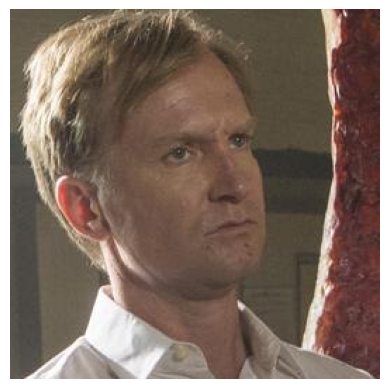

In [7]:
from PIL import Image

image_path = filter_df['image_path'][0] # accesing image using filepath
img = Image.open(image_path)

plt.imshow(img) # Display the image
plt.axis('off')
plt.show()


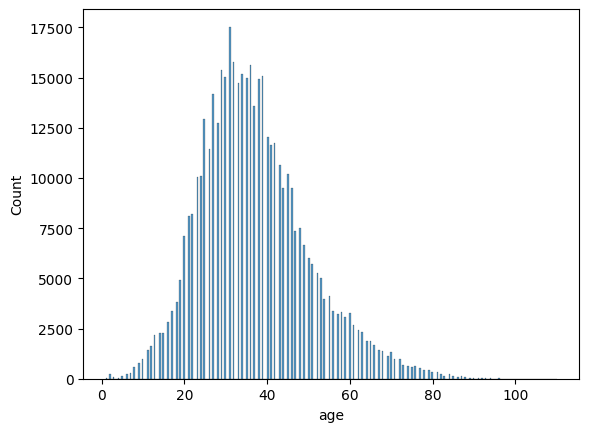

In [8]:
sns.histplot(filter_df['age']); # plotting age

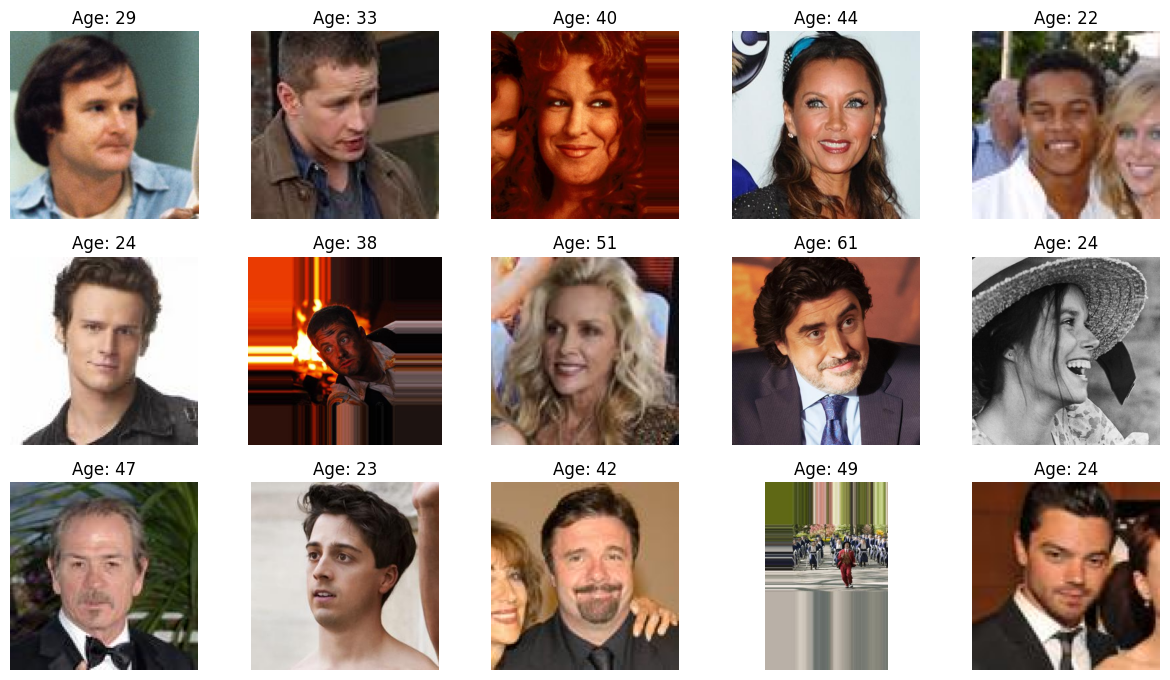

In [9]:
plt.figure(figsize=(15, 20)) # Set up the plot size

files = filter_df.iloc[100:115] # Select the range of files (rows 100 to 115 in the DataFrame)

for each, (index, file, age) in enumerate(files.itertuples(), start=1): # Iterate over files and display them in the plot
    plt.subplot(7, 5, each)  # Use each to place images correctly in the grid
    img = load_img(file)  # Load the image
    img = np.array(img)   # Convert to numpy array 
    plt.imshow(img)       # Show the image
    plt.title(f'Age: {age}')  # Add the age as title
    plt.axis('off')      

plt.show()


In [10]:
# Extracting Features from image path

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode = 'grayscale') # Convert rgb image into grayscale
        img = img.resize((128,128), Image.LANCZOS) # resize the image
        img = np.array(img) # turning image into numpy array
        features.append(img) # append the image

    features = np.array(features)
    features = features.reshape(len(features),128,128,1)
    return features

In [11]:
if 'image_path' in filter_df.columns: # Checking filter_df has the 'image_path' column
    image_paths = filter_df['image_path'][0:30000].tolist()  # Convert 300000 samples to list for processing
    X = extract_features(image_paths)
else:
    print("Error: 'image_path' column is missing in filter_df.")


  0%|          | 0/30000 [00:00<?, ?it/s]

In [12]:
X.shape

(30000, 128, 128, 1)

In [13]:
X = X/255.0 # normalize the image

In [14]:
y = filter_df['age'][0:30000] # defining labels
y = np.array(y) # converting into numpy arrays

In [15]:
from sklearn.model_selection import train_test_split # splitting the data into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [16]:
y_train = y_train.reshape(-1, 1) # reshape the data
y_test = y_test.reshape(-1, 1) 

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 128, 128, 1)
(24000, 1)
(6000, 128, 128, 1)
(6000, 1)


In [18]:
# Defining Model

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = (128, 128, 1)  

inputs = Input(input_shape)

# Convolutional and MaxPooling layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)

conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)

conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)

conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(maxp_4) # Flatten the feature map

dense_1 = Dense(256, activation='relu')(flatten) # Fully connected layers

dropout_1 = Dropout(0.3)(dense_1)

# Output layer for age estimation
output = Dense(1, activation='linear', name='age_out')(dropout_1)

# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam',loss='mae',metrics=['mae'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ age_out (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,747,649 (10.48 MB)

 Trainable params: 2,747,649 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train The Model
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), batch_size=32, epochs=30) 


Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - loss: 11.7902 - mae: 11.7902 - val_loss: 10.5063 - val_mae: 10.5063
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 10.3043 - mae: 10.3043 - val_loss: 9.9979 - val_mae: 9.9979
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 10.2065 - mae: 10.2065 - val_loss: 9.8969 - val_mae: 9.8969
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 10.1531 - mae: 10.1531 - val_loss: 10.0192 - val_mae: 10.0192
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 10.1518 - mae: 10.1518 - val_loss: 9.9799 - val_mae: 9.9799
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 10.0193 - mae: 10.0193 - val_loss: 9.8133 - val_mae: 9.8133
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 9.9918 - mae: 9.9918 - val_loss: 9.7250 - val_mae: 9.7250
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 10.0159 - mae: 10.0159 - val_loss: 9.8868 - val_mae: 9.8868
Epoch 9/30
750/750 ━━━

In [41]:
# model.save('Age_prediction_model.keras') # Save the model

In [35]:
'''# Extracting loss
loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss
epochs = range(len(loss))

# Plotting the loss graph
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();'''


"# Extracting loss\nloss = history.history['loss']  # Training loss\nval_loss = history.history['val_loss']  # Validation loss\nepochs = range(len(loss))\n\n# Plotting the loss graph\nplt.plot(epochs, loss, 'b', label='Training loss')\nplt.plot(epochs, val_loss, 'r', label='Validation loss')\nplt.title('Loss Graph')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.show();"

Original age: 23
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted age: 22


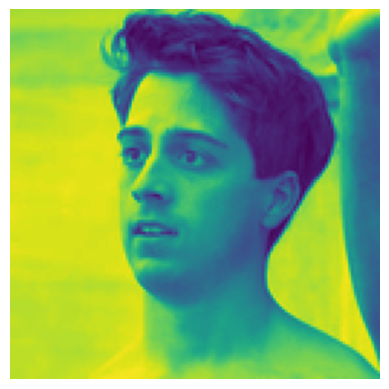

In [33]:
# Testing Image

import matplotlib.pyplot as plt

image_index = 111 # image index to visualize

actual_age = filter_df.iloc[image_index]['age'] # orignal age
print('Original age:', actual_age)

pred = model.predict(X[image_index].reshape(1, 128, 128, 1)) # predicted age

pred_age = round(pred[0][0]) # Round the predicted age to the nearest integer

print('Predicted age:', pred_age)

# Display the image
plt.imshow(X[image_index].reshape(128, 128, 1))
plt.axis('off')
plt.show()


Original age: 18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted age: 17


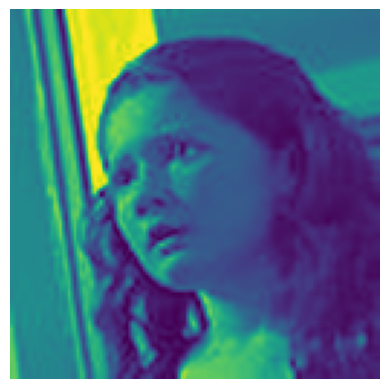

In [21]:
# Testing Image

import matplotlib.pyplot as plt

image_index = 489 # image index to visualize

actual_age = filter_df.iloc[image_index]['age'] # orignal age
print('Original age:', actual_age)

pred = model.predict(X[image_index].reshape(1, 128, 128, 1)) # predicted age

pred_age = round(pred[0][0]) # Round the predicted age to the nearest integer

print('Predicted age:', pred_age)

# Display the image
plt.imshow(X[image_index].reshape(128, 128, 1))
plt.axis('off')
plt.show()
